#DOGE-USD

##7:2:1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/DOGE-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
21/21 [==============================] - 3s 8ms/step - loss: 0.0071
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 8.9757e-04
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 7.4758e-04
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 6.9032e-04
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 5.7253e-04
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 5.0526e-04
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 5.0638e-04
Epoch 10/100
21/21 [==============================] - 0s 7ms/step - loss: 4.4502e-04
Epoch 11/100
21/21 [==============================] - 0s 4ms/step - loss: 3.7529e-04
Epoch 12/100
21/21 [==============================] - 0s 3ms/step - loss: 4.0806e-04
E

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

4/4 [==============================] - 0s 4ms/step


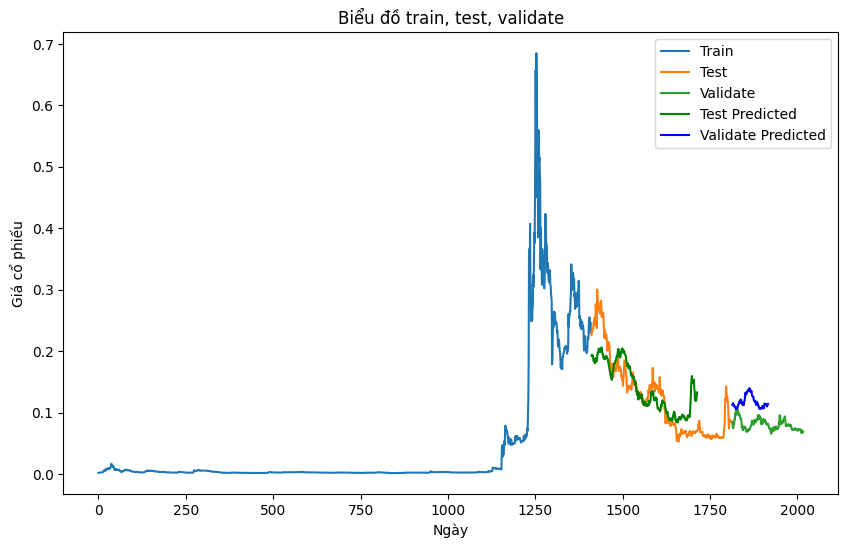

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

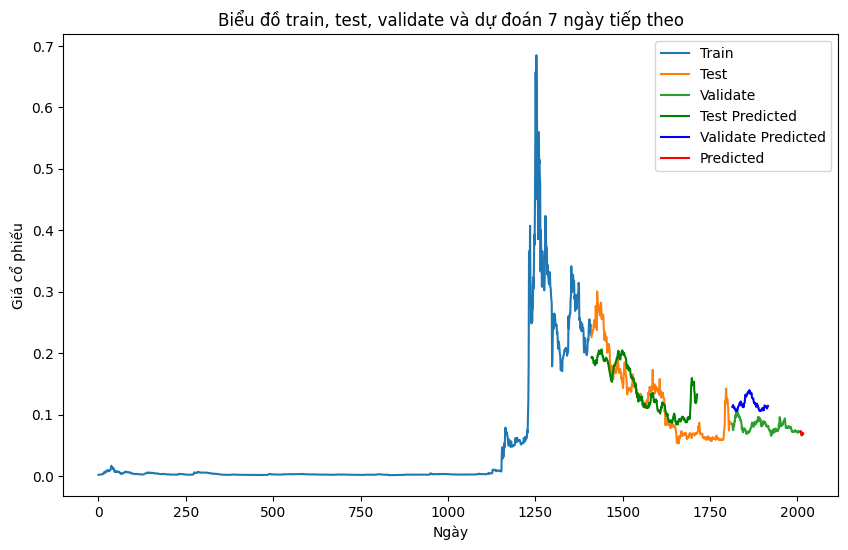

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.072671
2011    0.072471
2012    0.066573
2013    0.070373
2014    0.067300
2015    0.067966
2016    0.069489
Name: Close, dtype: float64


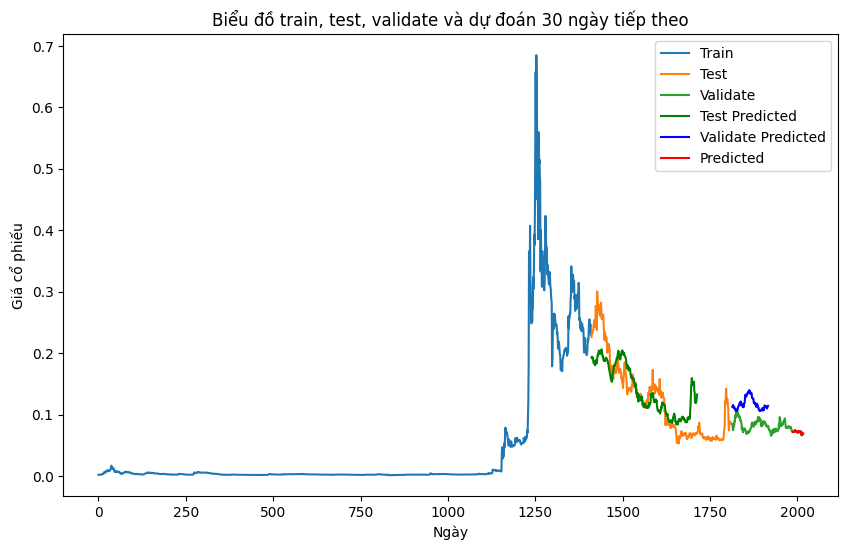

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.072085
1988    0.072459
1989    0.071777
1990    0.071986
1991    0.072046
1992    0.072729
1993    0.074911
1994    0.073546
1995    0.073527
1996    0.073670
1997    0.072142
1998    0.072998
1999    0.072864
2000    0.070735
2001    0.070875
2002    0.070984
2003    0.072683
2004    0.073613
2005    0.073185
2006    0.072361
2007    0.071660
2008    0.071492
2009    0.072612
2010    0.072671
2011    0.072471
2012    0.066573
2013    0.070373
2014    0.067300
2015    0.067966
2016    0.069489
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

4/4 [==============================] - 0s 5ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100

print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 53.307
MAE: 0.041
RMSE: 0.041
--------------------------
---------TEST----------
MAPE: 52.762
MAE: 0.046
RMSE: 0.048
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

##5:3:2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/DOGE-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.5)
test_size = int(len(scaled_prices) * 0.3)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
15/15 [==============================] - 2s 6ms/step - loss: 1.1258e-05
Epoch 2/100
15/15 [==============================] - 0s 14ms/step - loss: 2.0375e-06
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 1.5641e-06
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 1.4091e-06
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 1.2552e-06
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 1.1067e-06
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 9.7377e-07
Epoch 8/100
15/15 [==============================] - 0s 11ms/step - loss: 8.7223e-07
Epoch 9/100
15/15 [==============================] - 0s 8ms/step - loss: 7.5176e-07
Epoch 10/100
15/15 [==============================] - 0s 9ms/step - loss: 1.0967e-06
Epoch 11/100
15/15 [==============================] - 0s 10ms/step - loss: 6.5973e-07
Epoch 12/100
15/15 [==============================] - 0s 10ms/step 

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

10/10 [==============================] - 0s 2ms/step


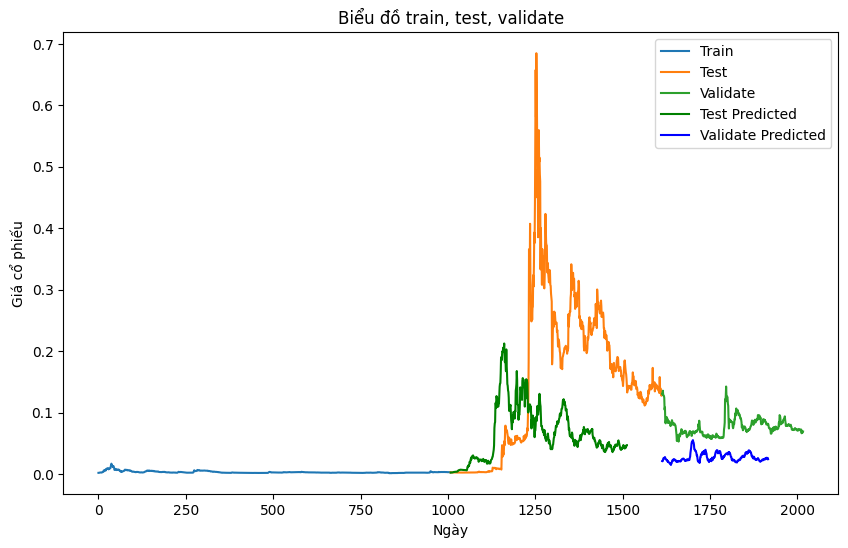

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

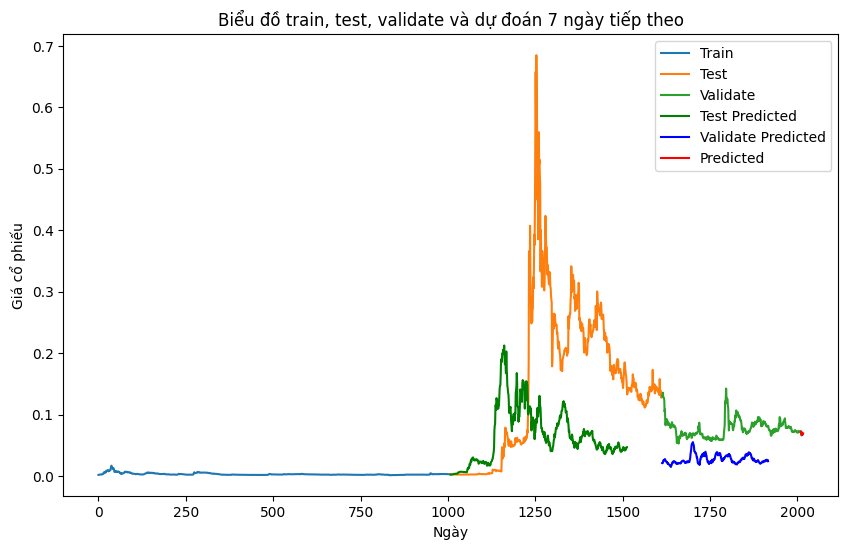

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.072671
2011    0.072471
2012    0.066573
2013    0.070373
2014    0.067300
2015    0.067966
2016    0.069489
Name: Close, dtype: float64


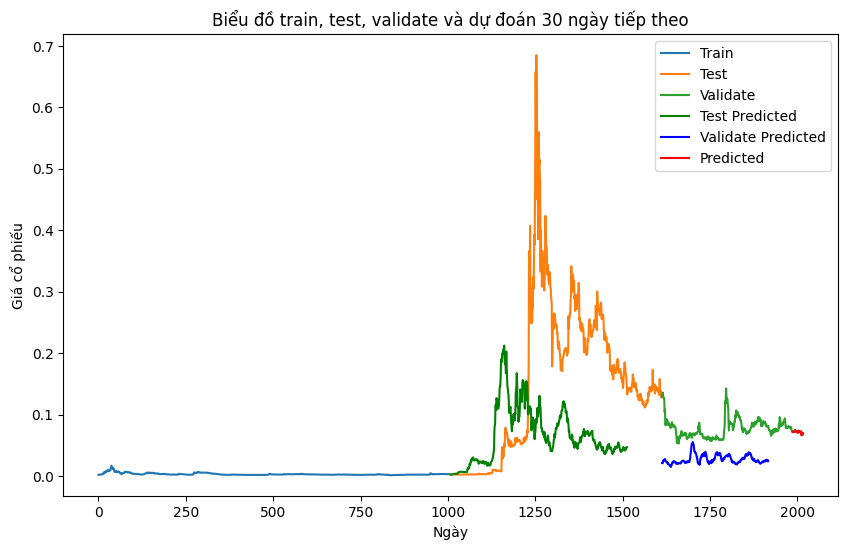

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.072085
1988    0.072459
1989    0.071777
1990    0.071986
1991    0.072046
1992    0.072729
1993    0.074911
1994    0.073546
1995    0.073527
1996    0.073670
1997    0.072142
1998    0.072998
1999    0.072864
2000    0.070735
2001    0.070875
2002    0.070984
2003    0.072683
2004    0.073613
2005    0.073185
2006    0.072361
2007    0.071660
2008    0.071492
2009    0.072612
2010    0.072671
2011    0.072471
2012    0.066573
2013    0.070373
2014    0.067300
2015    0.067966
2016    0.069489
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

10/10 [==============================] - 0s 2ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 64.735
MAE: 0.05
RMSE: 0.051
--------------------------
---------TEST----------
MAPE: 59.124
MAE: 0.115
RMSE: 0.141
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

##6:2:2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/DOGE-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.6)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 6.3845e-05
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 2.5123e-05
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2249e-05
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 8.7343e-06
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 7.4819e-06
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 7.7912e-06
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 1.1240e-05
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 6.5865e-06
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 6.2980e-06
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 7.7117e-06
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 6.4120e-06
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

10/10 [==============================] - 0s 2ms/step


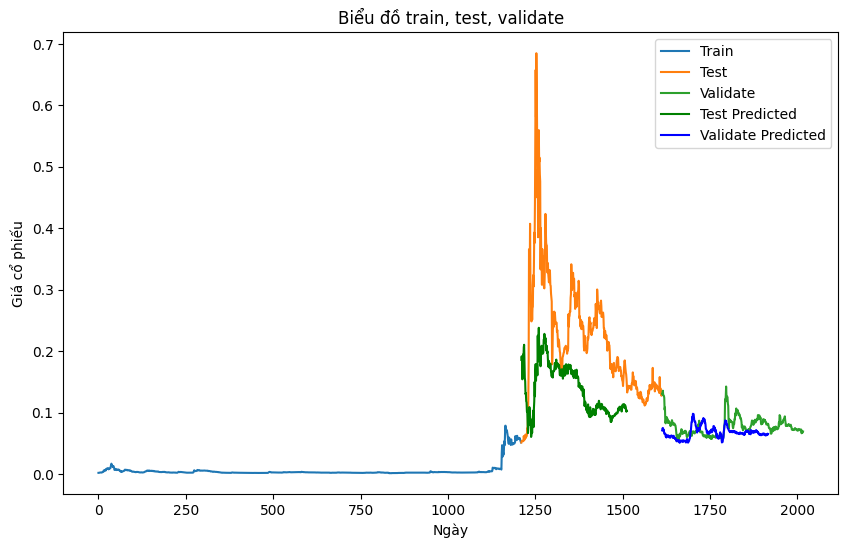

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

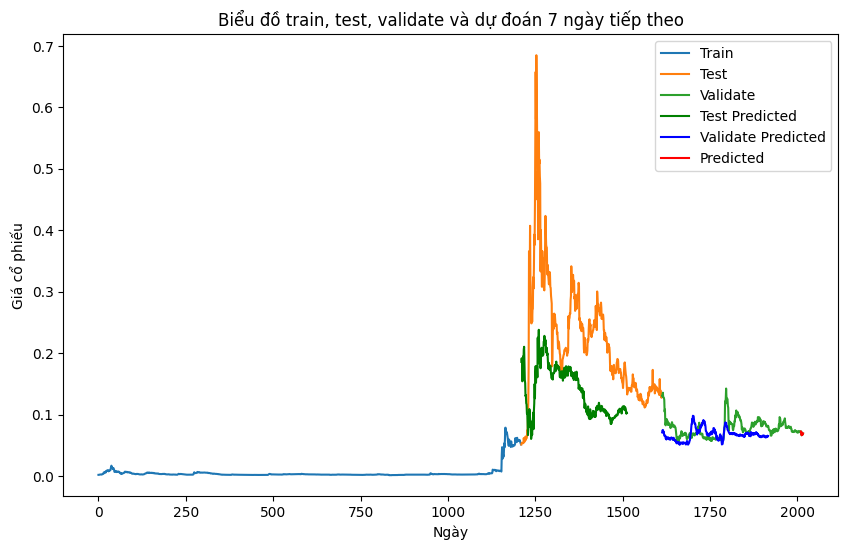

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.072671
2011    0.072471
2012    0.066573
2013    0.070373
2014    0.067300
2015    0.067966
2016    0.069489
Name: Close, dtype: float64


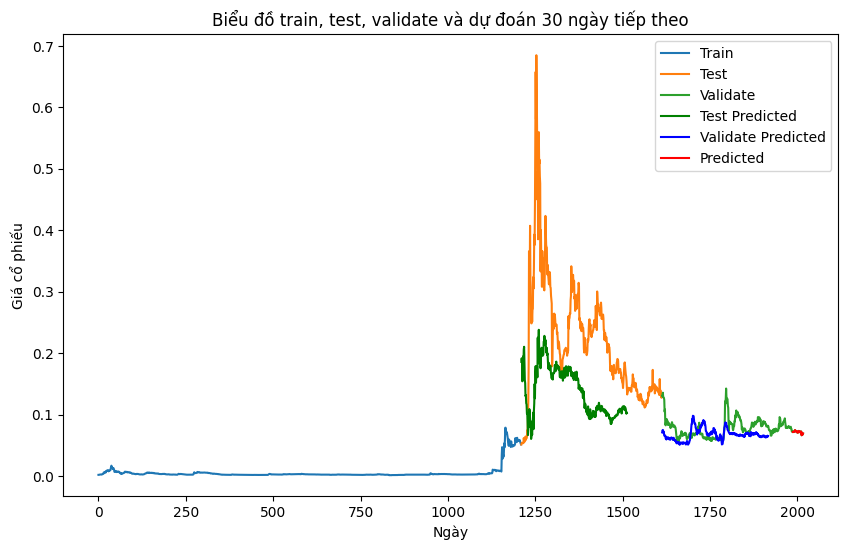

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.072085
1988    0.072459
1989    0.071777
1990    0.071986
1991    0.072046
1992    0.072729
1993    0.074911
1994    0.073546
1995    0.073527
1996    0.073670
1997    0.072142
1998    0.072998
1999    0.072864
2000    0.070735
2001    0.070875
2002    0.070984
2003    0.072683
2004    0.073613
2005    0.073185
2006    0.072361
2007    0.071660
2008    0.071492
2009    0.072612
2010    0.072671
2011    0.072471
2012    0.066573
2013    0.070373
2014    0.067300
2015    0.067966
2016    0.069489
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

10/10 [==============================] - 0s 2ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 13.021
MAE: 0.011
RMSE: 0.015
--------------------------
---------TEST----------
MAPE: 28.141
MAE: 0.057
RMSE: 0.067
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

#TRX-USD

##7:2:1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/TRX-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 0.0070
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 7.9235e-04
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 7.7384e-04
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 7.0313e-04
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 6.4174e-04
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 5.0998e-04
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 4.9979e-04
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 4.8380e-04
Epoch 11/100
21/21 [==============================] - 0s 3ms/step - loss: 4.9959e-04
Epoch 12/100
21/21 [==============================] - 0s 4ms/step - loss: 4.2829e-04
E

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

4/4 [==============================] - 0s 3ms/step


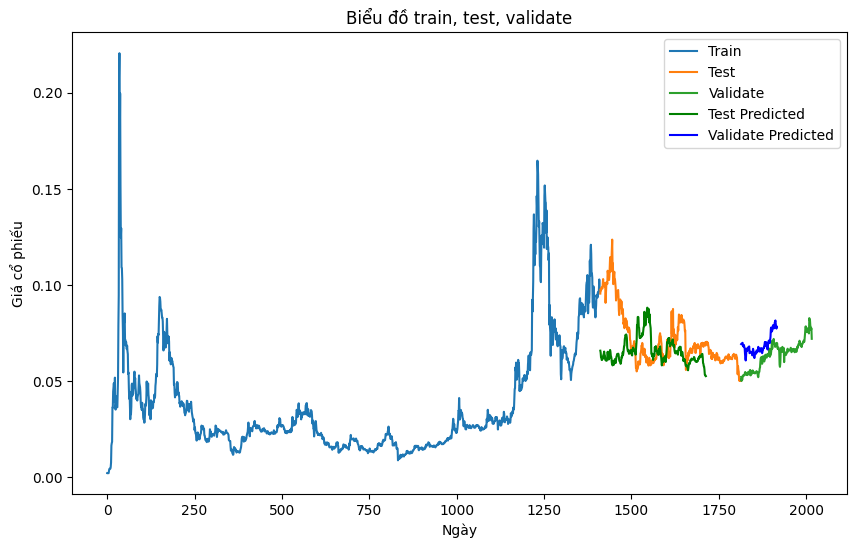

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

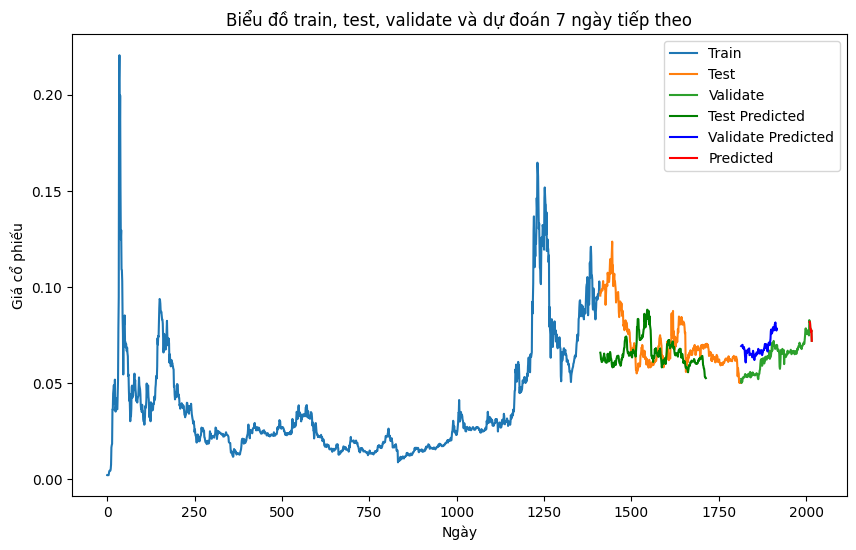

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.081834
2011    0.081478
2012    0.078347
2013    0.078234
2014    0.076741
2015    0.077495
2016    0.071984
Name: Close, dtype: float64


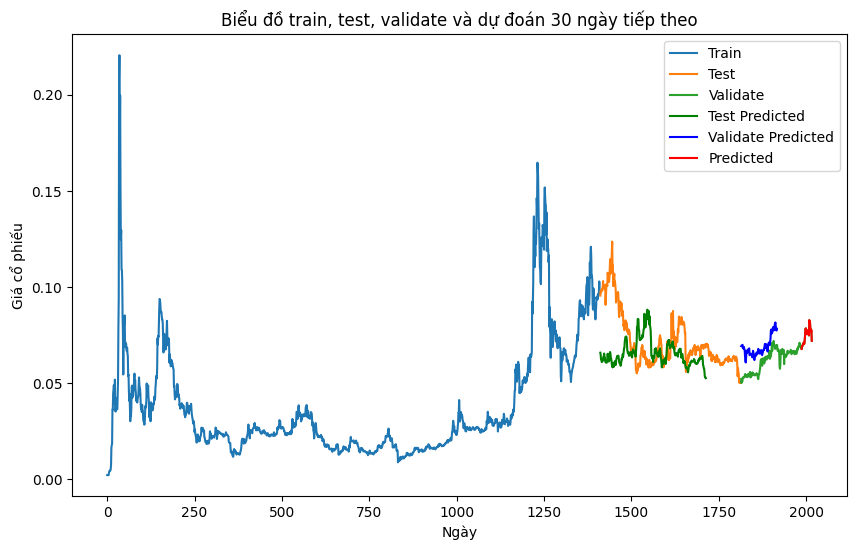

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.067705
1988    0.069096
1989    0.069380
1990    0.069401
1991    0.070242
1992    0.070559
1993    0.071052
1994    0.070276
1995    0.070675
1996    0.072650
1997    0.075124
1998    0.078168
1999    0.078481
2000    0.076898
2001    0.076813
2002    0.075489
2003    0.077189
2004    0.077448
2005    0.076160
2006    0.076402
2007    0.075282
2008    0.074773
2009    0.082754
2010    0.081834
2011    0.081478
2012    0.078347
2013    0.078234
2014    0.076741
2015    0.077495
2016    0.071984
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

4/4 [==============================] - 0s 3ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 2.547
MAE: 0.002
RMSE: 0.002
--------------------------
---------TEST----------
MAPE: 4.367
MAE: 0.003
RMSE: 0.004
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

##5:3:2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/TRX-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.5)
test_size = int(len(scaled_prices) * 0.3)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 9.2551e-04
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 4.9240e-04
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 3.4229e-04
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 2.8083e-04
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 2.5089e-04
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 2.8095e-04
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 2.2844e-04
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 2.0276e-04
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1.8149e-04
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 1.5254e-04
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1.28

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

10/10 [==============================] - 0s 3ms/step


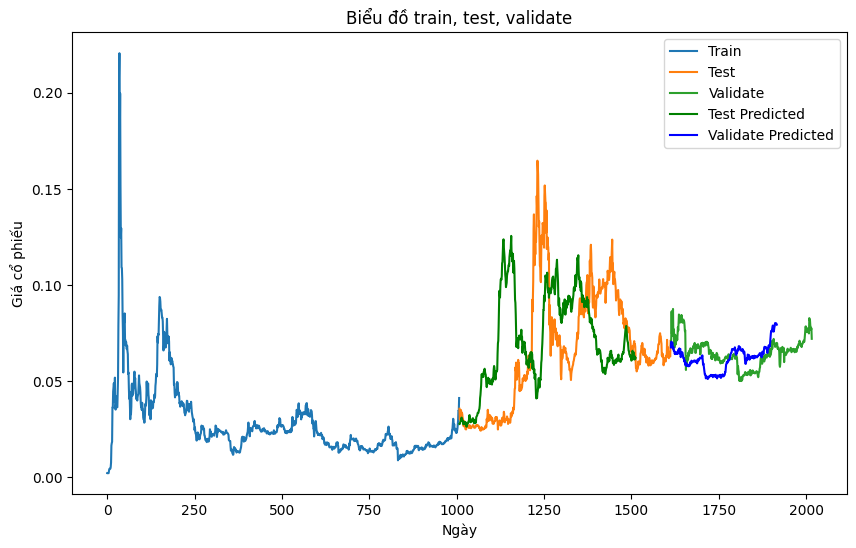

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

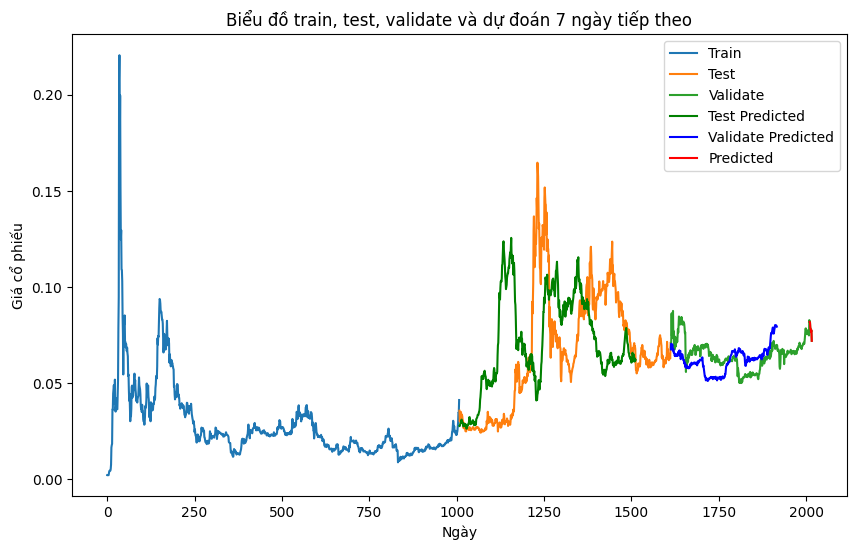

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.081834
2011    0.081478
2012    0.078347
2013    0.078234
2014    0.076741
2015    0.077495
2016    0.071984
Name: Close, dtype: float64


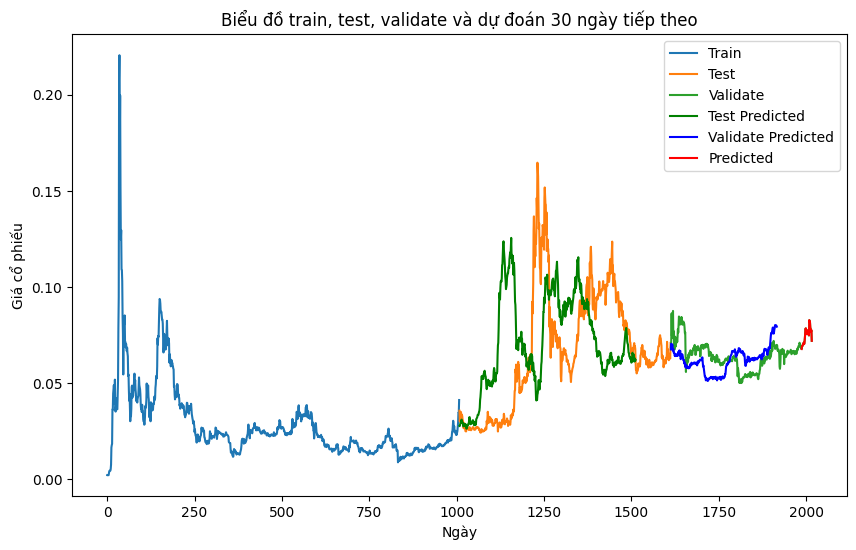

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.067705
1988    0.069096
1989    0.069380
1990    0.069401
1991    0.070242
1992    0.070559
1993    0.071052
1994    0.070276
1995    0.070675
1996    0.072650
1997    0.075124
1998    0.078168
1999    0.078481
2000    0.076898
2001    0.076813
2002    0.075489
2003    0.077189
2004    0.077448
2005    0.076160
2006    0.076402
2007    0.075282
2008    0.074773
2009    0.082754
2010    0.081834
2011    0.081478
2012    0.078347
2013    0.078234
2014    0.076741
2015    0.077495
2016    0.071984
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

10/10 [==============================] - 0s 2ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 3.494
MAE: 0.002
RMSE: 0.003
--------------------------
---------TEST----------
MAPE: 7.846
MAE: 0.006
RMSE: 0.01
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

##6:2:2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/TRX-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.6)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 8.1890e-04
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 4.6622e-04
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 3.3606e-04
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 2.6039e-04
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 2.1469e-04
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 1.9303e-04
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 1.9475e-04
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 2.0119e-04
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.7029e-04
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 1.5603e-04
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 1.32

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

10/10 [==============================] - 0s 2ms/step


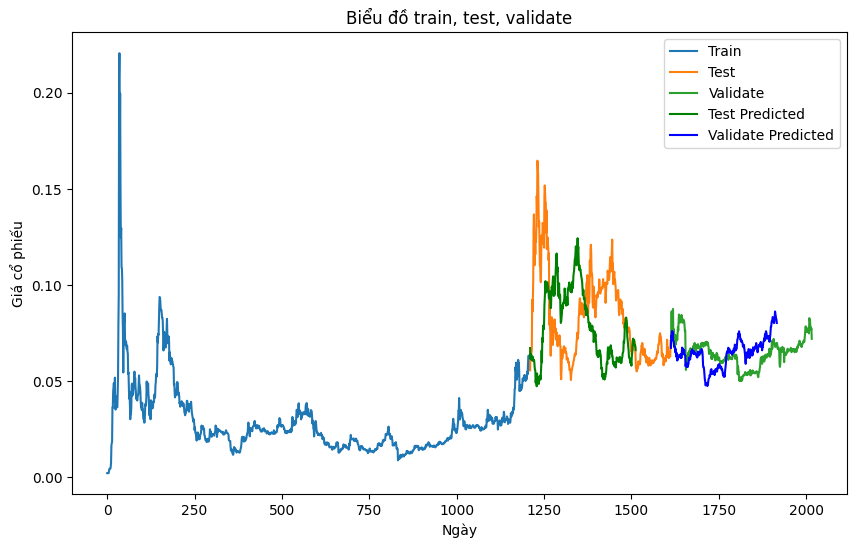

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

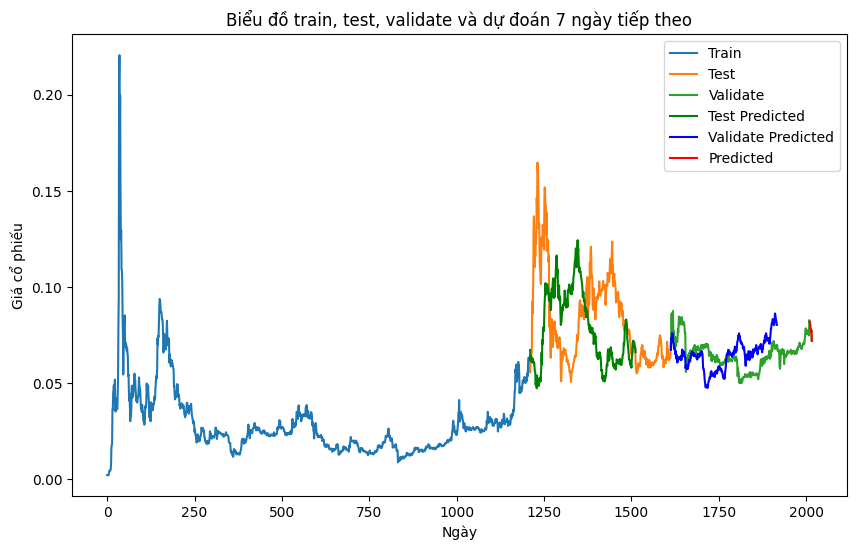

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.081834
2011    0.081478
2012    0.078347
2013    0.078234
2014    0.076741
2015    0.077495
2016    0.071984
Name: Close, dtype: float64


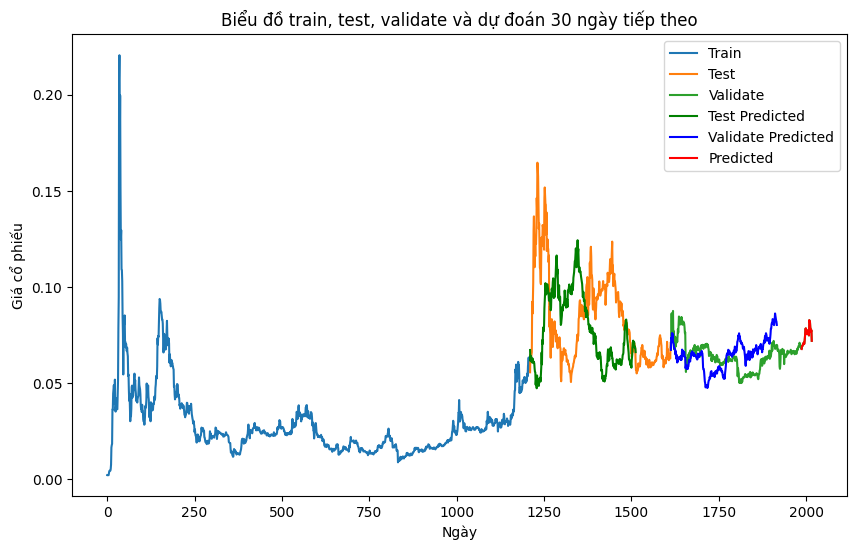

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.067705
1988    0.069096
1989    0.069380
1990    0.069401
1991    0.070242
1992    0.070559
1993    0.071052
1994    0.070276
1995    0.070675
1996    0.072650
1997    0.075124
1998    0.078168
1999    0.078481
2000    0.076898
2001    0.076813
2002    0.075489
2003    0.077189
2004    0.077448
2005    0.076160
2006    0.076402
2007    0.075282
2008    0.074773
2009    0.082754
2010    0.081834
2011    0.081478
2012    0.078347
2013    0.078234
2014    0.076741
2015    0.077495
2016    0.071984
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

10/10 [==============================] - 0s 2ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 3.868
MAE: 0.002
RMSE: 0.003
--------------------------
---------TEST----------
MAPE: 6.165
MAE: 0.005
RMSE: 0.006
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

#XLM-USD

##7:2:1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/XLM-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
21/21 [==============================] - 1s 3ms/step - loss: 0.0079
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 9.7739e-04
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 8.8424e-04
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 7.9898e-04
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 8.1524e-04
Epoch 11/100
21/21 [==============================] - 0s 3ms/step - loss: 7.0421e-04
Epoch 12/100
21/21 [==============================] - 0s 3ms/step - loss: 7.5224e-04
Epoch 13/100


In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

4/4 [==============================] - 0s 2ms/step


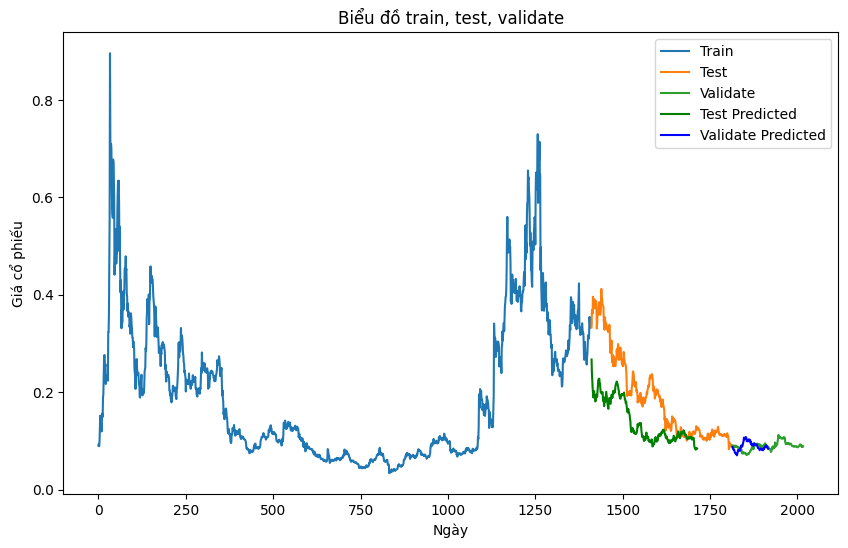

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

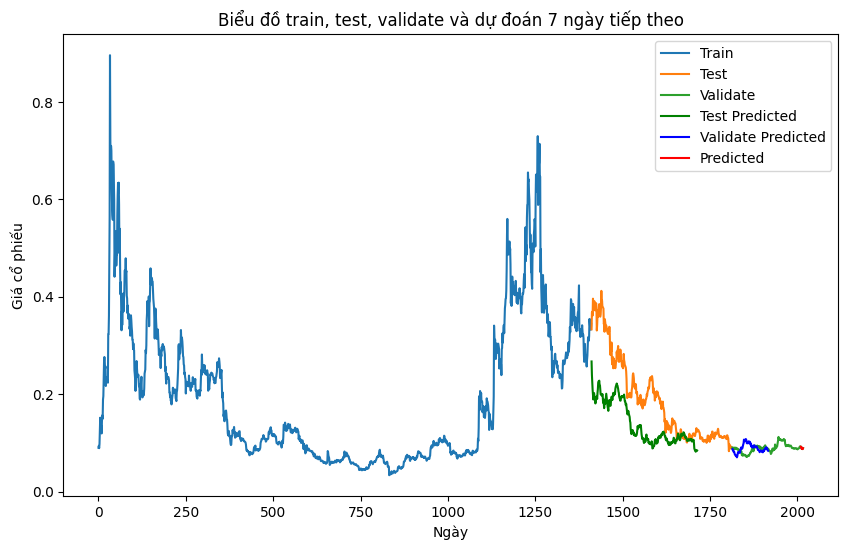

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.091992
2011    0.091388
2012    0.087906
2013    0.089685
2014    0.087353
2015    0.087150
2016    0.088990
Name: Close, dtype: float64


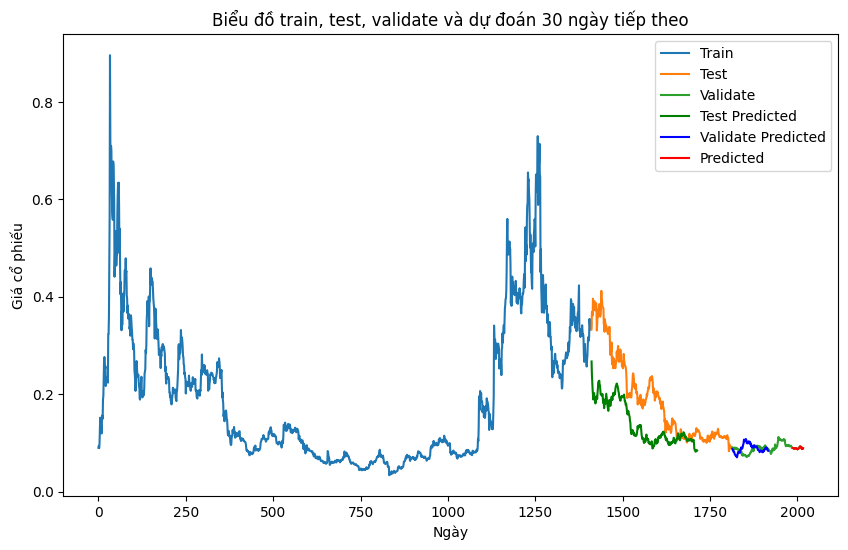

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.089505
1988    0.089109
1989    0.088337
1990    0.088723
1991    0.088083
1992    0.087902
1993    0.088579
1994    0.088740
1995    0.089204
1996    0.088848
1997    0.088127
1998    0.088141
1999    0.088147
2000    0.086510
2001    0.087027
2002    0.087831
2003    0.088136
2004    0.088698
2005    0.089315
2006    0.090843
2007    0.092578
2008    0.091087
2009    0.092045
2010    0.091992
2011    0.091388
2012    0.087906
2013    0.089685
2014    0.087353
2015    0.087150
2016    0.088990
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

4/4 [==============================] - 0s 2ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 4.726
MAE: 0.004
RMSE: 0.005
--------------------------
---------TEST----------
MAPE: 6.021
MAE: 0.009
RMSE: 0.011
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

##5:3:2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/XLM-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.5)
test_size = int(len(scaled_prices) * 0.3)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 7.4662e-04
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 5.7285e-04
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 4.9685e-04
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 4.0636e-04
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 4.3344e-04
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 3.8999e-04
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 3.4594e-04
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 3.3760e-04
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 2.7717e-04
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 2.7034e-04
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 2.33

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

10/10 [==============================] - 0s 3ms/step


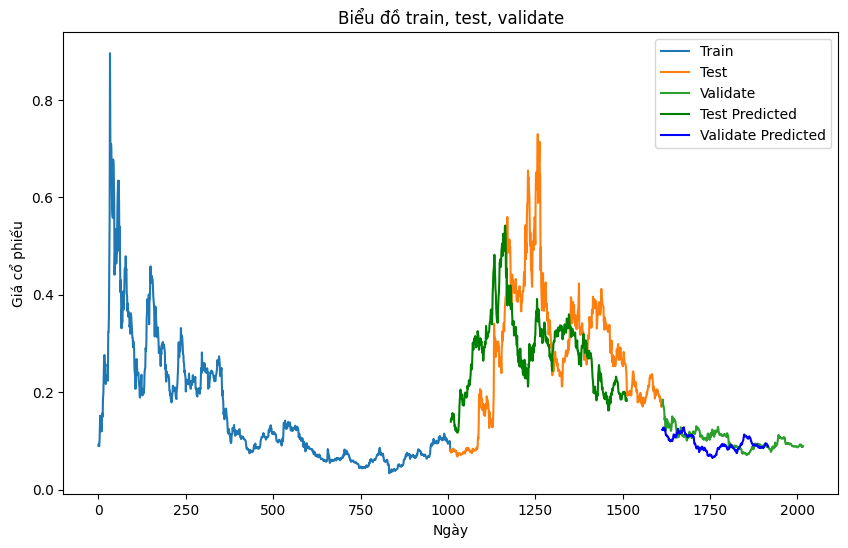

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

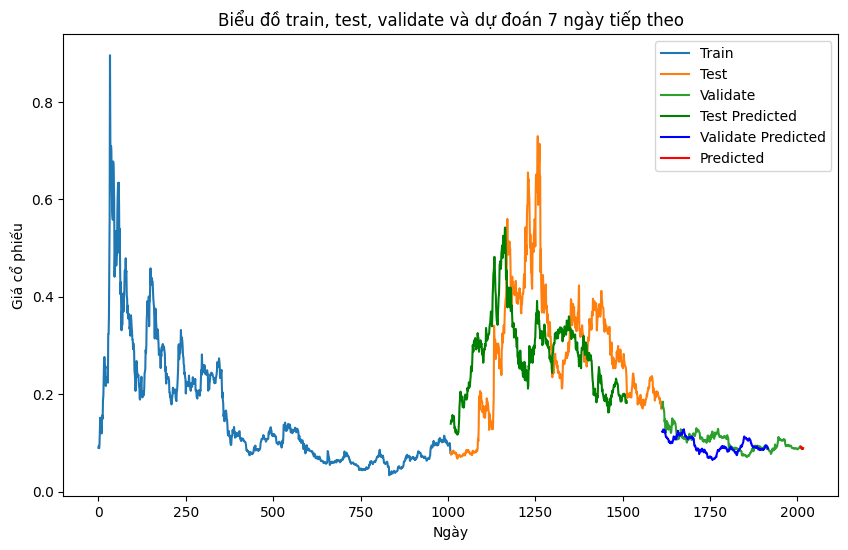

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.091992
2011    0.091388
2012    0.087906
2013    0.089685
2014    0.087353
2015    0.087150
2016    0.088990
Name: Close, dtype: float64


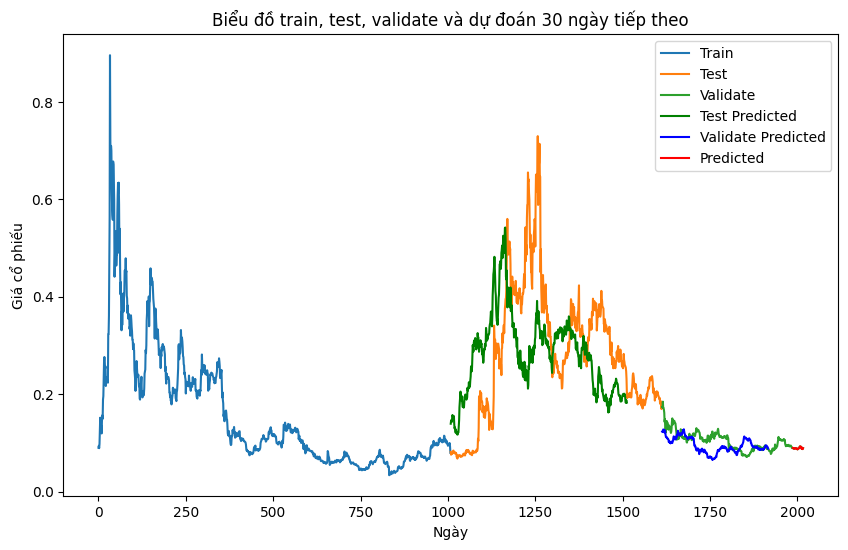

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.089505
1988    0.089109
1989    0.088337
1990    0.088723
1991    0.088083
1992    0.087902
1993    0.088579
1994    0.088740
1995    0.089204
1996    0.088848
1997    0.088127
1998    0.088141
1999    0.088147
2000    0.086510
2001    0.087027
2002    0.087831
2003    0.088136
2004    0.088698
2005    0.089315
2006    0.090843
2007    0.092578
2008    0.091087
2009    0.092045
2010    0.091992
2011    0.091388
2012    0.087906
2013    0.089685
2014    0.087353
2015    0.087150
2016    0.088990
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

10/10 [==============================] - 0s 2ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 3.689
MAE: 0.003
RMSE: 0.004
--------------------------
---------TEST----------
MAPE: 12.788
MAE: 0.047
RMSE: 0.072
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')

##6:2:2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/XLM-USD.csv')

In [ ]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.6)
test_size = int(len(scaled_prices) * 0.2)
validate_size = len(scaled_prices) - train_size - test_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]
validate_data = scaled_prices[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)
X_validate, y_validate = create_time_series(validate_data, time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)

In [ ]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 9.3489e-04
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 7.7540e-04
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 6.3087e-04
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 5.1966e-04
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 4.8343e-04
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 4.1704e-04
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 3.8074e-04
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 3.7813e-04
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 4.1404e-04
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 3.2007e-

In [ ]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Dự đoán giá trong quá trình validation
y_validate_pred = model.predict(X_validate)
y_validate_pred = scaler.inverse_transform(y_validate_pred)

# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]
validate = prices[train_size+test_size:]

# Tạo biến dự đoán 7 ngày tiếp theo
predicted_prices_7days = prices[-7:]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

10/10 [==============================] - 0s 2ms/step


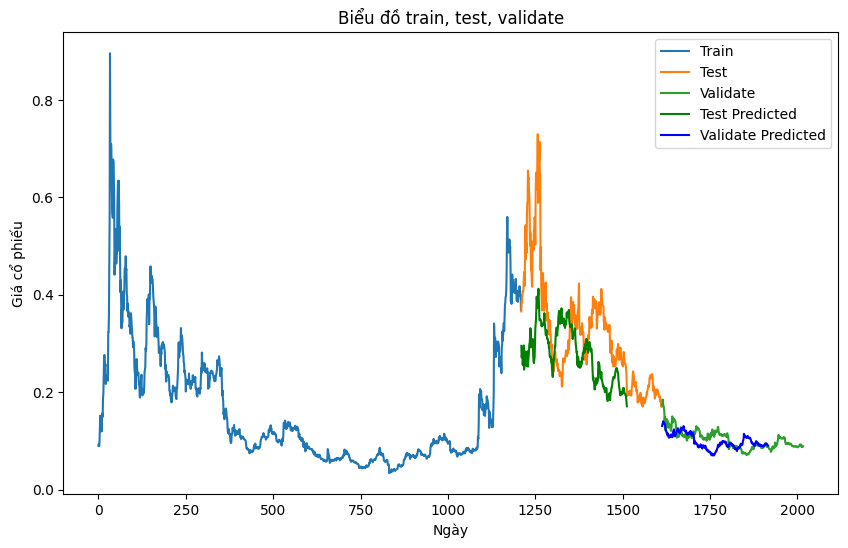

In [ ]:
# Tạo biểu đồ train, test, validate
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate')
plt.legend()
plt.show()

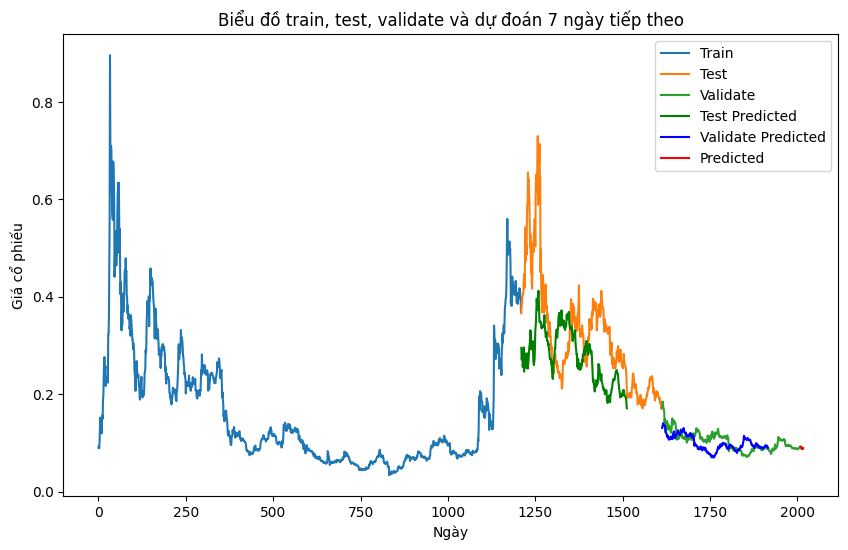

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-7, len(prices)), predicted_prices_7days, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 7 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 7 ngày tiếp theo:")
print(predicted_prices_7days)

Giá trị dự đoán 7 ngày tiếp theo:
2010    0.091992
2011    0.091388
2012    0.087906
2013    0.089685
2014    0.087353
2015    0.087150
2016    0.088990
Name: Close, dtype: float64


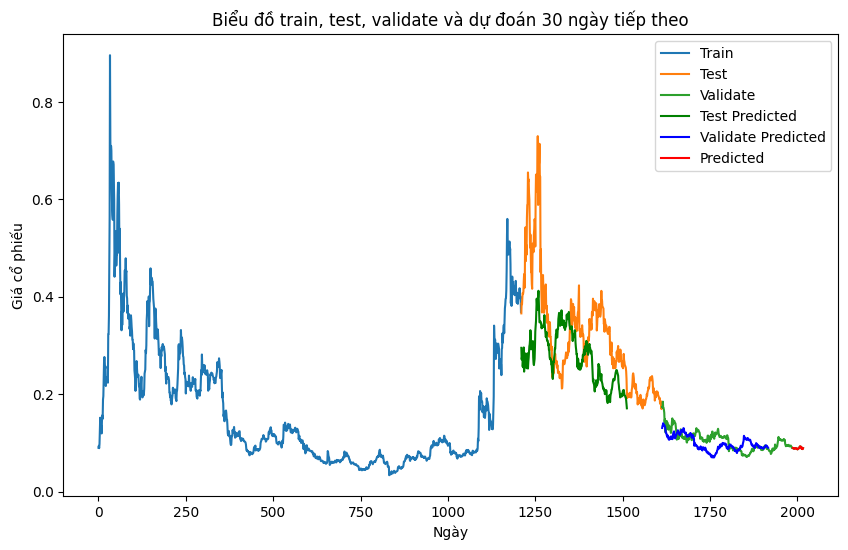

In [ ]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size+test_size, train_size+test_size+len(validate)), validate, label='Validate')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(train_size+test_size, train_size+test_size+len(y_validate_pred)), y_validate_pred, 'b', label='Validate Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1987    0.089505
1988    0.089109
1989    0.088337
1990    0.088723
1991    0.088083
1992    0.087902
1993    0.088579
1994    0.088740
1995    0.089204
1996    0.088848
1997    0.088127
1998    0.088141
1999    0.088147
2000    0.086510
2001    0.087027
2002    0.087831
2003    0.088136
2004    0.088698
2005    0.089315
2006    0.090843
2007    0.092578
2008    0.091087
2009    0.092045
2010    0.091992
2011    0.091388
2012    0.087906
2013    0.089685
2014    0.087353
2015    0.087150
2016    0.088990
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Dự đoán giá trong quá trình validation
y_validate_predicted = model.predict(X_validate)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
y_test = scaler.inverse_transform(y_test)
y_validate = scaler.inverse_transform(y_validate)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# Tính MAE cho validation
mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# Tính MAPE cho validation
mape_validate = mean_absolute_percentage_error(y_validate, y_validate_predicted)

# Tính RMSE cho validation
rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

10/10 [==============================] - 0s 2ms/step


In [ ]:
mape_test *= 100
mape_validate *= 100
print('---------VALIDATE----------')
print("MAPE:", round(mape_validate, 3))
print("MAE:", round(mae_validate, 3))
print("RMSE:", round(rmse_validate, 3))
print('--------------------------')
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


---------VALIDATE----------
MAPE: 4.262
MAE: 0.004
RMSE: 0.006
--------------------------
---------TEST----------
MAPE: 7.813
MAE: 0.021
RMSE: 0.026
-------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Dự đoán giá trong quá trình testing
# y_test_predicted = model.predict(X_test)

# # Dự đoán giá trong quá trình validation
# y_validate_predicted = model.predict(X_validate)

# # Đưa các dự đoán về lại tỷ lệ ban đầu
# y_test_predicted = scaler.inverse_transform(y_test_predicted)
# y_validate_predicted = scaler.inverse_transform(y_validate_predicted)
# y_test = scaler.inverse_transform(y_test)
# y_validate = scaler.inverse_transform(y_validate)

# # Tính MAE cho testing
# mae_test = mean_absolute_error(y_test, y_test_predicted)

# # Tính MSE cho testing
# mse_test = mean_squared_error(y_test, y_test_predicted)

# # Tính RMSE cho testing
# rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

# # Tính MAE cho validation
# mae_validate = mean_absolute_error(y_validate, y_validate_predicted)

# # Tính MSE cho validation
# mse_validate = mean_squared_error(y_validate, y_validate_predicted)

# # Tính RMSE cho validation
# rmse_validate = mean_squared_error(y_validate, y_validate_predicted, squared=False)

In [ ]:
# print('---------VALIDATE----------')
# print("MSE:", mse_validate)
# print("MAE:", mae_validate)
# print("RMSE:", rmse_validate)
# print('--------------------------')
# print('---------TEST----------')
# print("MSE:", mse_test)
# print("MAE:", mae_test)
# print("RMSE:", rmse_test)
# print('-------------------')